# Load packages
Once we have used the decode_lab_code.readers.ioreaders to save ephys data into the NWB files, we can now use that standard format with a variety of packages!!

In [1]:
from decode_lab_code.readers.ioreaders import load_nwb
import matplotlib.pyplot as plt
import numpy as np
import pynapple as nap
import os

folder_path = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS'
nwbname = 'nwbfile.nwb'

Cite NWB
Cite CatalystNeuro: NeuroConv toolbox if converting Neuralynx data


# NWB to Pynapple

In [5]:
data = nap.load_file(os.path.join(folder_path,nwbname))
print(data)

            nwbfile            
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Keys             ┃ Type     ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ units            │ TsGroup  │
│ ElectricalSeries │ TsdFrame │
└──────────────────┴──────────┘

Print out general statistics about neurons

In [3]:
spikes = data["units"]
spikes

  Index    rate  quality    location
-------  ------  ---------  ----------
      0    5.85  good       PFC
      1    0.08  good       PFC
      2    2.02  good       PFC
      3    0.17  good       PFC
      4    0.7   good       PFC
      5    6.01  good       PFC
      6    8.05  good       PFC
      7    0.12  good       PFC
      8    0.35  good       PFC
      9    1.2   good       PFC
     10    0.07  good       PFC
     11    2.8   good       PFC
     12    0.14  good       PFC
     13    0.29  good       PFC
     14    0.72  good       PFC
     15    2.9   good       PFC
     16    0.06  good       PFC
     17    3.93  good       PFC
     18    0.76  good       PFC
     19    2.1   good       PFC
     20    1.53  good       PFC
     21    2.74  good       PFC
     22    0.36  good       PFC

Can access neuron-specific spike times via dictionary like retrieval

In [13]:
spikes[0].rate

5.849425045230113

In [14]:
spikes[0]

Time (s)
8145.957584   NaN
8147.153709   NaN
8147.305834   NaN
8147.343740   NaN
8147.369677   NaN
               ..
9417.081834   NaN
9418.087427   NaN
9420.416365   NaN
9421.383240   NaN
9421.745146   NaN
Length: 7467, dtype: float64

Compute cross correlograms

notice that this array is 2D. Unit0 vs Unit1-N. Unit1 vs Unit2-N. Unit2 vs Unit3-N. That is why when you inspect Unit1 cc_wave[1], you don't see a correlation to unit0, because the correlation between Unit0 and Unit1 is represented by Unit0 (cc_wave[0][1])

In [15]:
cc_wake = nap.compute_crosscorrelogram(
    group=spikes,
    binsize=20,  # ms
    windowsize=4000,  # ms,
    norm=True,
    time_units="ms",
)

In [39]:
cc_wake[3][4]

-3.98    0.678085
-3.96    1.017128
-3.94    0.339043
-3.92    0.339043
-3.90    0.000000
           ...   
 3.90    1.017128
 3.92    0.339043
 3.94    0.678085
 3.96    0.678085
 3.98    0.678085
Name: 4, Length: 399, dtype: float64

In [36]:
cc_wake[0][2]

-3.98    0.942753
-3.96    0.892960
-3.94    0.922836
-3.92    0.989227
-3.90    0.942753
           ...   
 3.90    0.883001
 3.92    0.896279
 3.94    0.992546
 3.96    0.965990
 3.98    0.892960
Name: 2, Length: 399, dtype: float64

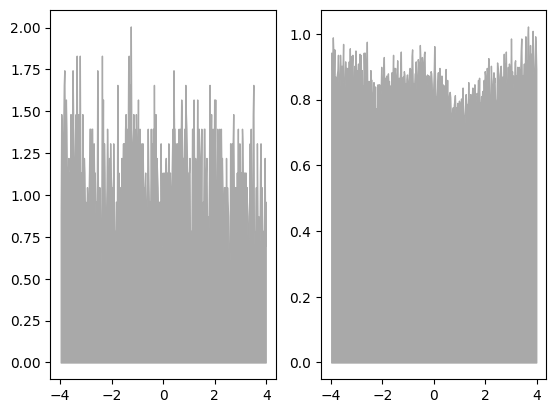

In [42]:
xtwake = cc_wake.index.values
plt.subplot(121)
plt.fill_between(
    xtwake, np.zeros_like(xtwake), cc_wake[0][1].values, color="darkgray"
)
plt.subplot(122)
plt.fill_between(
    xtwake, np.zeros_like(xtwake), cc_wake[0][2].values, color="darkgray"
)

# NWB to spikeinterface
